In [1]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from IPython.core.display import Image, display
import pandas as pd

options = Options()
options.headless = True # headless means "no graphical interface"
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

def show_screen():
    b.set_window_size(300, 400)
    b.save_screenshot("screen.png")
    display(Image("screen.png"))
    
def grab_table(tbl):
    trs = tbl.find_elements(by="tag name", value="tr")
    rows = []
    for tr in trs:
        row = tr.find_elements(by="tag name", value="td")
        row = [td.text for td in row]
        rows.append(row)
    return pd.DataFrame(rows[1:], columns=rows[0])

In [2]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page4.html"
b.get(url)

<AxesSubplot:>

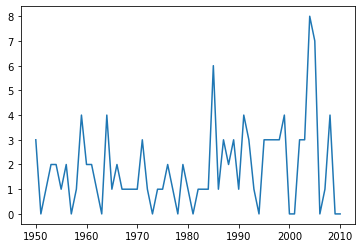

In [3]:
# year, search_btn
def grab_year(year):
    year_box = b.find_element(value="year")
    search_btn = b.find_element(value="search_btn")
    year_box.clear()
    year_box.send_keys(year)
    search_btn.click()
    #show_screen()
    table = b.find_element(value="hurricanes")
    return grab_table(table)

# GOALS:
# line plot: hurricanes per year
# concat into one giant DataFrame

s = pd.Series(dtype=float)

data_frames = []
for year in range(1950, 2011):
    df = grab_year(year)
    data_frames.append(df)
    s.loc[year] = len(df)

s.plot.line()

In [4]:
df = pd.concat(data_frames).reset_index(drop=True)
df

,name,formed,dissipated,mph,damage,deaths
0,Baker,08/18/1950,09/01/1950,105,2.55M,38
1,Easy,09/01/1950,09/09/1950,125,3.3M,2
2,King,10/13/1950,10/20/1950,130,32M,11
3,Able,08/18/1952,09/02/1952,105,2.75M,3
4,FLORENCE,09/23/1953,09/26/1953,115,200K,0
...,...,...,...,...,...,...
108,Humberto,09/12/2007,09/14/2007,90,50M,1
109,Gustav,08/25/2008,09/07/2008,150,8.31B,112
110,Dolly,07/20/2008,07/27/2008,100,1.6B,1
111,Ike,09/01/2008,09/15/2008,145,38B,214


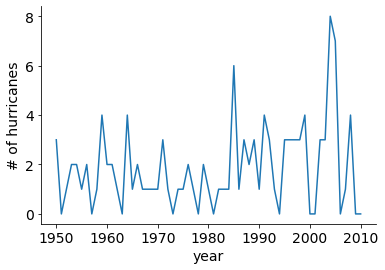

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14
ax = s.plot.line()
ax.set_xlabel("year")
ax.set_ylabel("# of hurricanes")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Crawl Pages with BFS

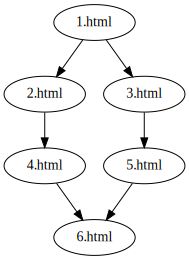

In [6]:
from collections import deque
from graphviz import Digraph
start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"

nodes_to_visit = deque([start_url])
added = {start_url}

gv = Digraph()

while len(nodes_to_visit) > 0: # while there's work to do
    # 1. do some work
    curr_url = nodes_to_visit.popleft() # .pop(0)
    #print(curr_url)
    gv.node(curr_url.split("/")[-1])
    b.get(curr_url)
    #show_screen()
    
    # 2. note down any additional work discovered (links are children)
    links = b.find_elements(by="tag name", value="a")
    for link in links:
        child_url = link.get_attribute("href")
        
        gv.edge(curr_url.split("/")[-1], child_url.split("/")[-1])
        
        if not child_url in added:
            nodes_to_visit.append(child_url)
            added.add(child_url)

    #print(nodes_to_visit)
    
gv

In [7]:
b.close()